<a href="https://colab.research.google.com/github/kfrancis2017/csce556-labs/blob/main/CSCE556_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 556 - Data Analysis in Python

## Laboratory 7 - Pattern recognition and artificial intelligence

The objective of this laboratory is to gain some familiarity with techniques from pattern recognition, machine learning, and artificial intelligence.

### Preamble
For this laboratory, we will use data collected from neurons.

In [3]:
# Colab is not compatible anymore with allensdk!!

#!pip install -q --no-dependencies allensdk

We start by using the API from the [Allen Institute for Brain Science](https://alleninstitute.org/what-we-do/brain-science/research/allen-institute-brain-science/) to download cellular data. These data were obtained during patch clamp experiments. These are experiments where we insert a probe within a neuron to stimulate it electrically and record its response. A set of notebooks showing examples of how to use this API can be found [here](https://allensdk.readthedocs.io/en/latest/examples.html) if you are interested in knowing more.

In [4]:
import pandas as pd

# Colab is not compatible anymore with allensdk!!
"""from allensdk.core.cell_types_cache import CellTypesCache, CellTypesApi

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto your hard drive.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# Listing all available cells an making a data frame containing
# this information.
cells_df = pd.DataFrame(ctc.get_cells()).set_index("id")
"""


# Loading a dataframe listing all available cells.
import urllib.request

url = "https://www.dropbox.com/scl/fi/vs6txv9mzxmws57h1n69e/cell_df.csv?rlkey=fbv645gqo9qfh1qwy5dbfe5qd&dl=1"
urllib.request.urlretrieve(url, "cells_df.csv");

cells_df = pd.read_csv("cells_df.csv").set_index("id")
cells_df

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,NaN,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,NaN,spiny,intact,NaN,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NaN,NaN,NaN,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NaN,NaN,NaN,319194354,right,0.469578
528642047,NaN,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,NaN,aspiny,NaN,NaN,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NaN,NaN,NaN,605622695,right,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601958555,NaN,"[68.0, 252.0, 106.0]",Homo Sapiens,H17.03.010.11.13.06,4,12141,MTG,NaN,spiny,intact,full,epilepsy,601901227,left,0.514498
488473535,negative,"[9177.35470186006, 972.994403914619, 8421.8095...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,2/3,385,VISp,Rorb-IRES2-Cre,aspiny,NaN,NaN,NaN,487607572,left,0.240614
467003163,positive,"[9559.14360513319, 1615.03869355735, 2565.0012...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,4,385,VISp,Rorb-IRES2-Cre,spiny,truncated,NaN,NaN,322489498,right,0.363275


Note that cells have been collected for two species:

In [5]:
species = cells_df["species"].unique()
species

array(['Homo Sapiens', 'Mus musculus'], dtype=object)

In plain English, these are humans (Homo Sapiens) and mice (Mus musculus).

We now load the values computed for the electrophysiological features (see [Allen Institute's white paper on electrophysiological characterization](http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf
) for more information on these features). Note that the IDs specified in the `specimen_id` column (and set as an index) in the table `ef_df` below correspond to the IDs specified in the `id` column (and set as the index) in the table `cell_df`.

In [6]:
# Colab is not compatible anymore with allensdk!!
# ef_df = pd.DataFrame(ctc.get_ephys_features()).set_index("specimen_id")


url = "https://www.dropbox.com/scl/fi/o4t7gqi8j4fia9t16998r/ef_df.csv?rlkey=o0hpr0bvjjqmvyz96i8rhmnbs&dl=1"
urllib.request.urlretrieve(url, "ef_df.csv");

ef_df = pd.read_csv("ef_df.csv").set_index("specimen_id")
ef_df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569955172,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,12.216207,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983
573410831,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,2.847900,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977
576285618,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,2.426347,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848


We can visualize the data for a set of features present in `ef_df` (`adaptation`, `f_i_curve_slope`, `inpute_resistance_mohm`, and `tau` in this example), using `species` for the `hue`.

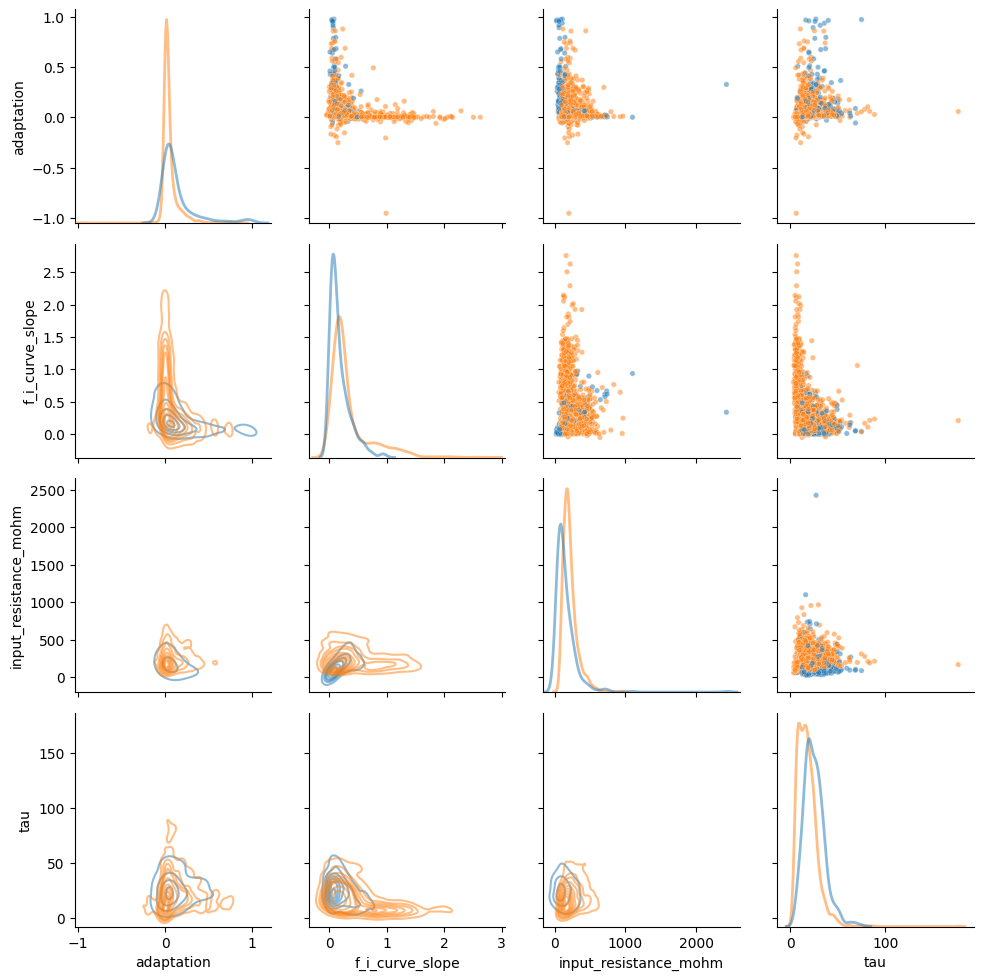

In [7]:
import seaborn as sns
features = ["adaptation", "f_i_curve_slope",
            "input_resistance_mohm", "tau"]

dat = cells_df[["species"]].merge(ef_df[features],
                                  left_index=True, right_index=True)

g = sns.PairGrid(dat,
                 diag_sharey=False,
                 hue="species")
g.map_upper(sns.scatterplot, s=15, alpha=0.5)
g.map_lower(sns.kdeplot, alpha=0.5)
g.map_diag(sns.kdeplot, lw=2, alpha=0.5, common_norm=False)

This plot provides a qualitative appreciation of whether recorded cells have a different electrophysiological behavior between mice and humans, but they do not allow us to conclude with certainty if differences are statistically significant. We can use a Student t-test to evaluate whether there is a significant difference in these features between species. Note that both the t and p values are reported by the Scipy implementation of the t-test. Also note that for such a test to be valid, only one value per subject must be used (i.e., no repetitions within subjects; the `donor_id` column in cells_df specifies the identity of the subject). To present these results in a way that is "publication-ready", we can use a Pandas DataFrame to show numbers in a format like `X.XXe+XX ± X.XXe+XX (N=XXXX)`, encoding this information as strings.

In [8]:
from scipy.stats import ttest_ind
import numpy as np

dat = cells_df[["species", "donor_id"]].merge(ef_df[features],
                                  left_index=True, right_index=True)

dat = dat.groupby(["donor_id", "species"]).mean().reset_index()

means_x = []
means_y = []
ts = []
ps = []
for feature in features:
  x = dat.loc[dat.species == species[0], feature].dropna()
  y = dat.loc[dat.species == species[1], feature].dropna()
  t, p = ttest_ind(x, y)
  ts.append(f"{t:.2e}")
  ps.append(f"{p:.2e}")
  means_x.append(f"{np.mean(x):.2e} ± {np.std(x):.2e} (N={len(x)})")
  means_y.append(f"{np.mean(y):.2e} ± {np.std(y):.2e} (N={len(y)})")

stats_df = pd.DataFrame({f"{species[0]} mean ± STD (N)": means_x,
                         f"{species[1]} mean ± STD (N)": means_y,
                          "t statistics": ts, "p-values": ps})

stats_df.index = features

stats_df

,Homo Sapiens mean ± STD (N),Mus musculus mean ± STD (N),t statistics,p-values
adaptation,1.24e-01 ± 9.42e-02 (N=41),5.22e-02 ± 8.04e-02 (N=869),5.56e+00,3.62e-08
f_i_curve_slope,1.87e-01 ± 1.16e-01 (N=42),3.34e-01 ± 3.18e-01 (N=920),-2.98e+00,2.98e-03
input_resistance_mohm,1.76e+02 ± 1.19e+02 (N=42),2.18e+02 ± 9.07e+01 (N=920),-2.94e+00,3.33e-03
tau,2.42e+01 ± 6.28e+00 (N=42),1.79e+01 ± 9.20e+00 (N=920),4.38e+00,1.31e-05


### Assignment

For that laboratory, we will use the `ef_df` DataFrame we just loaded and use it to develop a classifier that can predict if a cell comes from a human or a mouse. As previously shown, the `ef_df` DataFrame contains electrophysiological features in a wide format. However, some of these columns are not relevant features (i.e., IDs). Therefore, we drop these columns to keep only the columns corresponding to relevant features. We also drop `seal_gohm`. This column contains the resistance of the seal between the pipette and the cell during the patch clamp recording. This characterizes the instrumentation, not the cell itself.

In [9]:
features = ef_df.drop(columns=['rheobase_sweep_id', 'rheobase_sweep_number',
                               'thumbnail_sweep_id', 'id',
                               #'specimen_id',      # specimen_id is set and an index of ef_df
                               'seal_gohm'])

Write a classifier that uses electrophysiological features to automatically classify the species from which cells have been collected. You will need the following functions and classes (see their documentation to know how to use them):

In [10]:
# Use this class to impute NaNs with mean values.
from sklearn.impute import SimpleImputer

# Use this class to standardize the values of the features.
from sklearn.preprocessing import StandardScaler

# Use this class to create a multilayer perceptron (MLP) classifier.
from sklearn.neural_network import MLPClassifier

# Use this class to implement a stratified shuffle split cross-validation.
# Use 20 splits.
from sklearn.model_selection import StratifiedShuffleSplit

# Use these three metrics to measure the performance of your classifier. Since
# you have 20 splits, you'll have distributions (N=20) for each of these
# metrics.
from sklearn.metrics import f1_score, precision_score, recall_score

# This function can be used to "encode" as number the species (categorical variable)
def code_species(y, categories=('Homo Sapiens', 'Mus musculus')):
  return pd.Categorical(y, ordered=True, categories=categories).codes

# Setting the seed for the random generator so that the result is reproducible
import numpy as np
np.random.seed(10)


##### insert your code ##### (about 30 lines)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_features = imputer.fit_transform(features)

scaler = StandardScaler()

############################

On the same figure, overlay the kernel density estimation (kde) of the distribution of the three computed statistics (f1, precision, recall). The resulting figure should look like this:

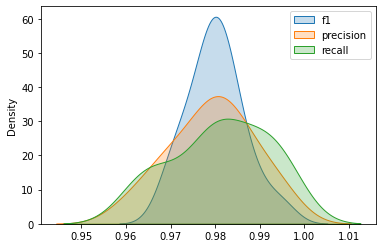

Note that your figure may not be identical, as I used a different random seed to compute this figure.

In [ ]:
##### insert your code ##### (about 7 lines)

############################

# Bonus exercice

This exercise is optional. If answered convincingly, I will add up to 20% to your score for this laboratory. Any point over 100% will be transferred to previous labs for which you did not get all your points.

Modify your code from the lab to use `GroupShuffleSplit` as a cross-validation approach so that repeated measurements from the same donors are appropriately attributed to either the train or the test sets, using `donor_id` as a grouping factor. As previously, use 20 splits. For each split, compute sets of FPR (false positive ratio) and TPR (true positive ratio) values. This can be done using the `sklearn.metrics.roc_curve` function. Vectors of TPR and FPR values can be concatenated into a DataFrame to be used to display the ROC curve using `sns.lineplot` so that we can see the ROC curve along with 95% confidence intervals around the mean ROC values. For the `sns.lineplot` function to work correctly, the (FPR, TPR) values must be aligned along the x-axis (i.e., the FPR values must be the same from one split to the next). To "align" the FPR values, you will need to interpolate TPR values over a regular grid of FPR values (e.g., `np.arange(0, 1.001, 0.001)`) using `scipy.interpolate.interp1d`.

For each split, compute the area under the ROC curve (AUC) using `scipy.integrate.trapezoid` and display the violinplot of the distribution of AUC values on a second panel. Used a 4-to-1 width ratio for the two plots.

The final figure should look like this:
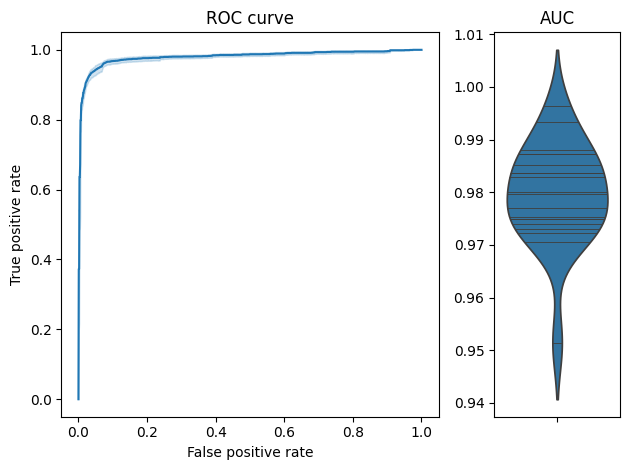

In [ ]:
##### insert your code ##### (about 50 lines)


############################